# Spatiotemporal Cluster Overlay (STCO)

Luke Zaruba, Bryan Runck

In [7]:
# Imports
import contextily as ctx
import geopandas as gpd
from matplotlib import pyplot as plt
from stco.clustering import TemporalADBSCAN
from stco.overlay import simple_overlay, stcec, weighted_overlay

## Data

In [5]:
# Load data
incidents_gdf = gpd.read_file("../../data/core/INCIDENTS.geojson")
ctu_gdf = gpd.read_file("../../data/core/CTU.geojson")

### STCO: Simple

In [4]:
# Create ADBSCAN Clusters per Year
tadbs = TemporalADBSCAN(
    data=incidents_gdf,
    period="Y",
    eps=0.15,
    min_sample_pct=0.01,
    time_field="incident_date",
    pct_exact=0.5,
    reps=50,
    keep_solus=True,
)

tadbs_clusters = tadbs.fit_all()

tadbs_clusters.head()

100%|██████████| 7/7 [00:12<00:00,  1.73s/it]


,PERIOD,geometry
0,2020,"POLYGON ((-92.58501 44.41688, -92.51114 44.325..."
1,2020,"POLYGON ((-94.00187 45.23214, -94.00489 45.232..."
10,2020,"POLYGON ((-93.95922 44.26481, -93.95235 44.329..."
14,2020,"POLYGON ((-93.46615 43.52854, -93.49341 43.676..."
16,2020,"POLYGON ((-93.43934 44.23364, -93.44938 44.230..."


In [8]:
# Simple Overlay
stco_so = simple_overlay(tadbs_clusters.copy())

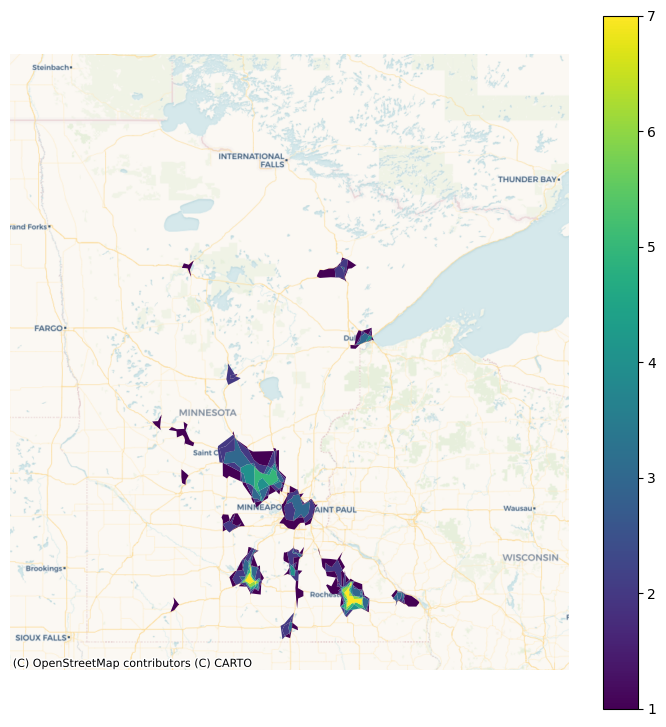

In [9]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

stco_so = stco_so.set_crs(epsg=4326)
stco_so.to_crs(epsg=3857).plot(column="COUNT", legend=True, ax=ax)
ctu_gdf.to_crs(epsg=3857).plot(alpha=0, ax=ax)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

ax.axis("off")
plt.show()

### STCO: Weighted

In [10]:
# Weighted Overlay
stco_wo = weighted_overlay(tadbs_clusters.copy())

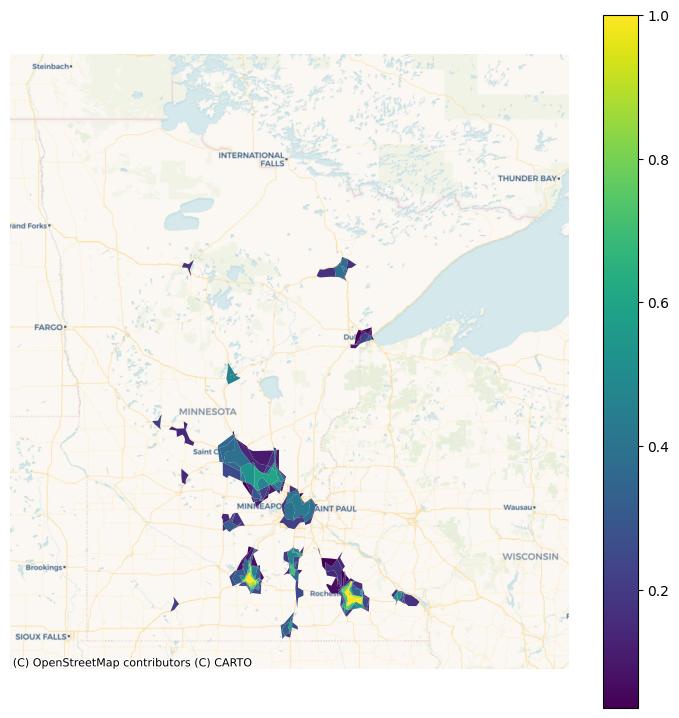

In [11]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

stco_wo = stco_wo.set_crs(epsg=4326)
stco_wo.to_crs(epsg=3857).plot(column="WEIGHT", legend=True, ax=ax)
ctu_gdf.to_crs(epsg=3857).plot(alpha=0, ax=ax)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

ax.axis("off")
plt.show()

### STCEC

In [12]:
# STCEC
stcec_classes = stcec(tadbs_clusters.copy(), significance_percent=0.8)

KeyError: 82 not found
KeyError: 246 not found
KeyError: 414 not found
KeyError: 426 not found


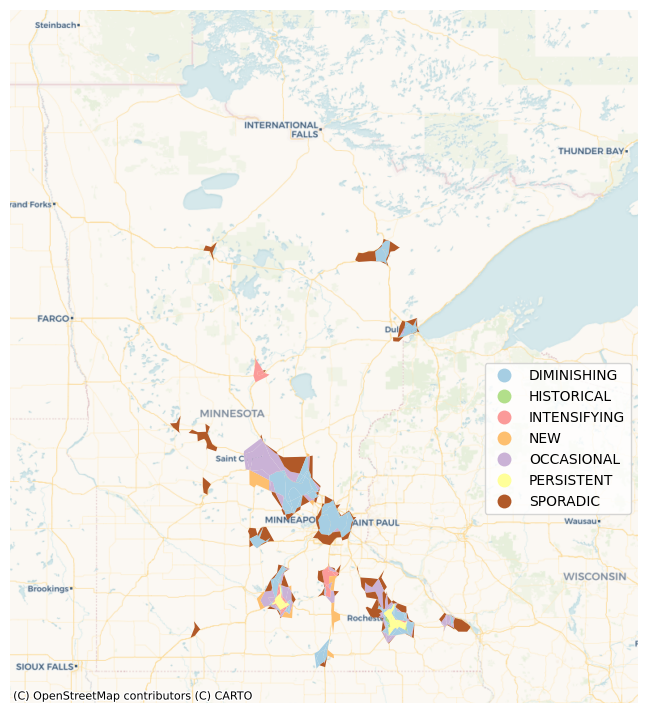

In [13]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

stcec_classes = stcec_classes.set_crs(epsg=4326)
stcec_classes.to_crs(epsg=3857).plot(
    column="STCEC",
    cmap="Paired",
    legend=True,
    ax=ax,
    legend_kwds={"bbox_to_anchor": (1, 0.5)},
)
ctu_gdf.to_crs(epsg=3857).plot(alpha=0, ax=ax)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

ax.axis("off")
plt.show()